# Import Libraries 

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

# Load the Data

In [48]:
df = pd.read_csv("C:\\Users\\Dell\\OneDrive\\Desktop\\Google-data_Analytics_project\\hotel_booking.csv\\hotel_booking.csv")

In [49]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [50]:
df.shape

(119390, 36)

In [51]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [53]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [54]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [55]:
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,name,email,phone-number,credit_card
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,81503,115889,119390,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,Michael Johnson,Michael.C@gmail.com,669-792-1661,************4923
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,48,6,1,28


In [56]:
list1 = []
for col in df.describe(include = 'object').columns:
    dict2 = {col:df[col].unique()}
    list1.append(dict2)
pd.DataFrame(list1)   

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,name,email,phone-number,credit_card
0,"[Resort Hotel, City Hotel]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,"[July, August, September, October, November, D...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,"[BB, FB, HB, SC, Undefined]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,"[PRT, GBR, USA, ESP, IRL, FRA, nan, ROU, NOR, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,"[Direct, Corporate, Online TA, Offline TA/TO, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,"[Direct, Corporate, TA/TO, Undefined, GDS]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,"[C, A, D, E, G, F, H, L, P, B]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[C, A, D, E, G, F, I, B, H, P, L, K]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[No Deposit, Refundable, Non Refund]",NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Transient, Contract, Transient-Party, Group]",NaN,NaN,NaN,NaN,NaN


In [57]:
df.drop(['company','agent'],axis = 1, inplace = True)

In [58]:
df.dropna(inplace = True)

In [59]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [60]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [61]:
x="C:/Users/Dell/OneDrive/Desktop/data anylytics 2/dataForML/Hotel_Booking_Cleaned.csv"

df.to_csv(x, index=False)

<Axes: >

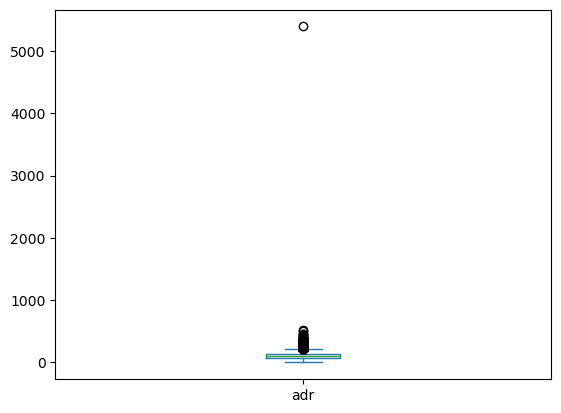

In [62]:
df['adr'].plot(kind = 'box')

In [63]:
df = df[df['adr']<5000]

<Axes: >

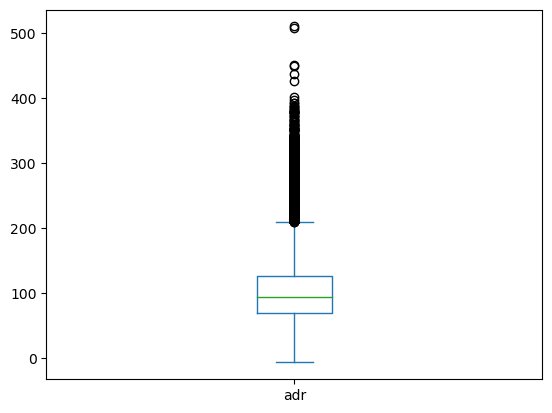

In [64]:
df['adr'].plot(kind = 'box')

# Data Analysis and Visualizations

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64


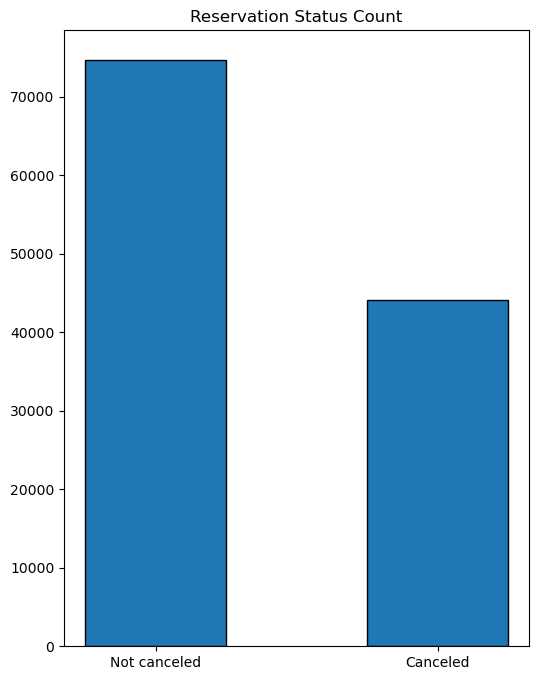

In [13]:
cancelled_percentage = df['is_canceled'].value_counts(normalize=True)
print(cancelled_percentage)

plt.figure(figsize=(6,8))
plt.title("Reservation Status Count")
plt.bar(['Not canceled','Canceled'],df['is_canceled'].value_counts(),edgecolor = 'k', width = 0.5)
plt.show()

Text(0, 0.5, 'number of reservations')

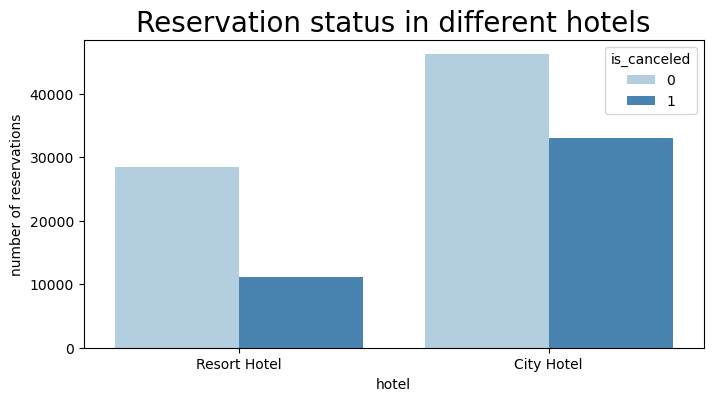

In [14]:
plt.figure(figsize=(8,4))
ax1 = sb.countplot(x  = 'hotel' ,hue = 'is_canceled' ,data = df, palette = 'Blues')
legend_labels,_ = ax1.get_legend_handles_labels()
plt.title("Reservation status in different hotels" , size = 20)
plt.xlabel('hotel')
plt.ylabel('number of reservations')

In [66]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [72]:
city_hotel = df[df['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)

0    0.582918
1    0.417082
Name: is_canceled, dtype: float64

In [73]:
#x="C:/Users/Dell/OneDrive/Desktop/Google-data_Analytics_project/Resort_Hotel_Cleaned.csv"

#resort_hotel.to_csv(x, index=False)
#x="C:/Users/Dell/OneDrive/Desktop/Google-data_Analytics_project/City_Hotel_Cleaned.csv"

#city_hotel.to_csv(x, index=False)

In [74]:
city_hotel


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
40060,City Hotel,0,6,2015,July,27,1,0,2,1,...,Transient,0.00,0,0,Check-Out,2015-07-03,Elizabeth Ross,Ross.Elizabeth@att.com,313-076-6204,************4378
40061,City Hotel,1,88,2015,July,27,1,0,4,2,...,Transient,76.50,0,1,Canceled,2015-07-01,Adam Aguilar,AAguilar@comcast.net,796-281-4143,************2797
40062,City Hotel,1,65,2015,July,27,1,0,4,1,...,Transient,68.00,0,1,Canceled,2015-04-30,Mark Keller,Mark_Keller@hotmail.com,227-821-0234,************9384
40063,City Hotel,1,92,2015,July,27,1,2,4,2,...,Transient,76.50,0,2,Canceled,2015-06-23,Sarah Scott,SScott88@aol.com,443-817-6604,************7979
40064,City Hotel,1,100,2015,July,27,2,0,2,2,...,Transient,76.50,0,1,Canceled,2015-04-02,Misty Perry,Misty.P68@att.com,801-946-4619,************4844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


In [17]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

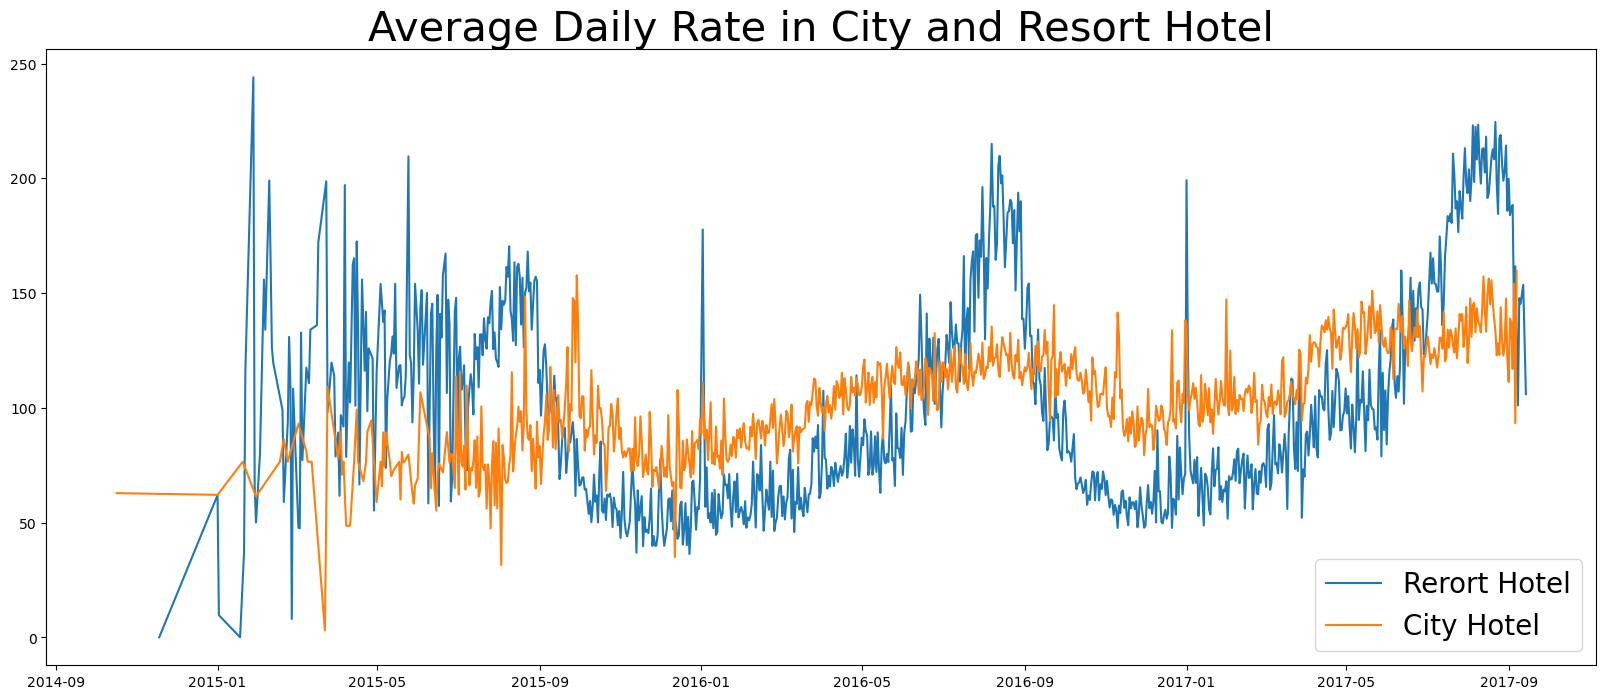

In [18]:
plt.figure(figsize = (20,8))
plt.title("Average Daily Rate in City and Resort Hotel", fontsize=30)
plt.plot(resort_hotel.index,resort_hotel['adr'], label='Rerort Hotel')
plt.plot(city_hotel.index,city_hotel['adr'], label='City Hotel')
plt.legend(fontsize = 20)
plt.show()

In [19]:
df['month'] = df['reservation_status_date'].dt.month

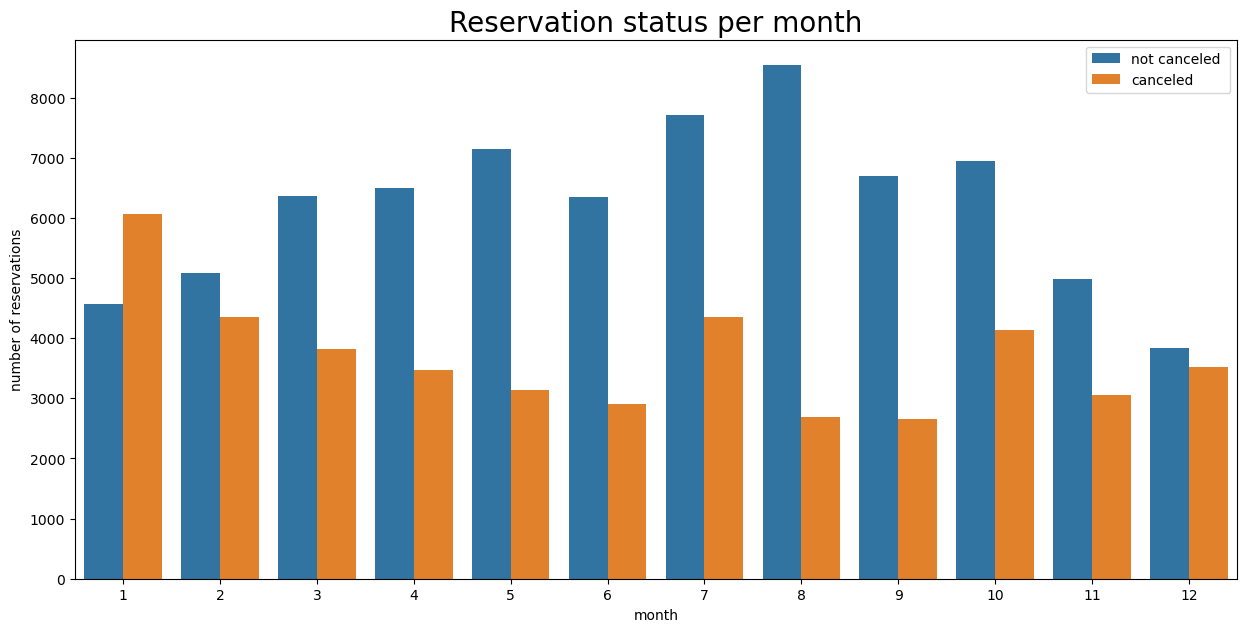

In [20]:
plt.figure(figsize=(15,7))
ax1 = sb.countplot(x = 'month', hue = 'is_canceled', data = df)
ax1.legend(bbox_to_anchor=(1,1))
plt.title("Reservation status per month" , size = 20)
plt.xlabel('month')
plt.ylabel('number of reservations')
plt.legend(['not canceled ' , 'canceled'])

In [21]:
canceled_data_count = df[ df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index()
canceled_data_count

,month,adr
0,1,571203.57
1,2,447675.76
2,3,424872.56
3,4,425315.23
4,5,391438.08
5,6,359003.34
6,7,481376.17
7,8,325668.43
8,9,274176.33
9,10,330968.87


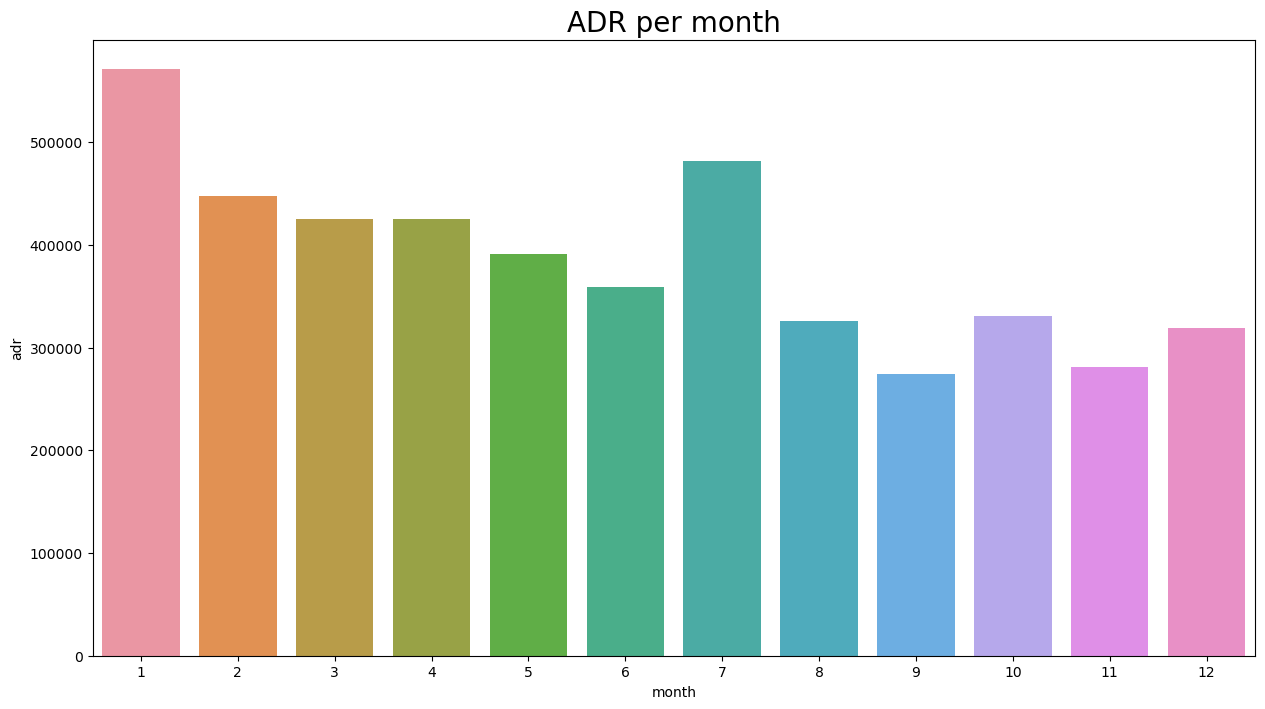

In [22]:
plt.figure(figsize=(15,8))

plt.title("ADR per month" , fontsize = 20)
sb.barplot(x='month', y='adr', data=canceled_data_count)
plt.show()

([<matplotlib.patches.Wedge at 0x244ea645ba0>,
 [Text(-0.6485414980270044, 0.888478432679651, 'PRT'),
  Text(-0.12452901505974424, -1.0929284168728757, 'GBR'),
  Text(0.2795827699816853, -1.0638766257087182, 'ESP'),
  Text(0.6082427774650023, -0.9165373553007318, 'FRA'),
  Text(0.8244337697170071, -0.7282231521657391, 'ITA'),
  Text(0.9549224064682716, -0.5460065911917595, 'DEU'),
  Text(1.0312598327523899, -0.38275730868464564, 'IRL'),
  Text(1.0729025706347506, -0.24265216653750293, 'BRA'),
  Text(1.0926161903610716, -0.12723938290033737, 'USA'),
  Text(1.0992090719340442, -0.041706308610296686, 'BEL')],
 [Text(-0.35374990801472966, 0.48462459964344595, '70.07'),
  Text(-0.06792491730531504, -0.5961427728397503, '6.25'),
  Text(0.1524996927172829, -0.5802963412956644, '5.54'),
  Text(0.331768787708183, -0.49992946652767184, '4.93'),
  Text(0.44969114711836744, -0.39721262845403943, '3.39'),
  Text(0.5208667671645117, -0.297821777013687, '3.10'),
  Text(0.5625053633194853, -0.20877671

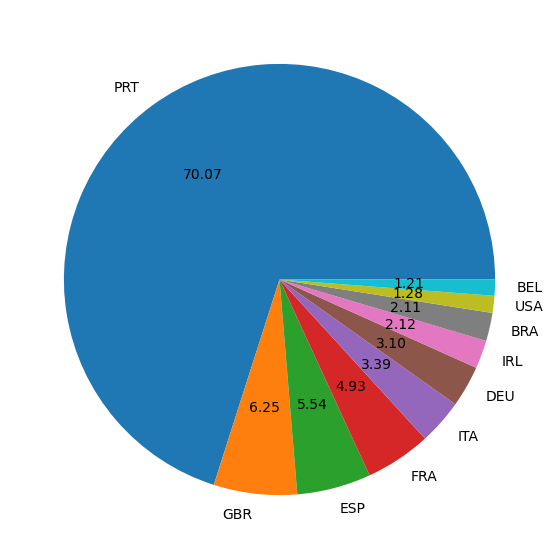

In [23]:
canceled_data = df[df['is_canceled']  == 1]
top_10_country = canceled_data['country'].value_counts()[:10]
plt.figure(figsize= (15,7))
plt.pie(top_10_country , autopct= '%.2f',labels=top_10_country.index)

In [24]:
market_segment_count = pd.DataFrame(df['market_segment'].value_counts())
market_segment_count.columns = ['market_segment_Count']
market_segment_count

,market_segment_Count
Online TA,56402
Offline TA/TO,24159
Groups,19806
Direct,12448
Corporate,5111
Complementary,734
Aviation,237


In [25]:

market_segment_per = pd.DataFrame(df['market_segment'].value_counts(normalize= True))
market_segment_per.columns = ['market_segment_per']
market_segment_per

,market_segment_per
Online TA,0.474377
Offline TA/TO,0.203193
Groups,0.166581
Direct,0.104696
Corporate,0.042987
Complementary,0.006173
Aviation,0.001993


In [26]:
market_segment_per = pd.DataFrame(canceled_data['market_segment'].value_counts(normalize= True))
market_segment_per.columns = ['market_segment_per']
market_segment_per

,market_segment_per
Online TA,0.469696
Groups,0.273985
Offline TA/TO,0.187466
Direct,0.043486
Corporate,0.022151
Complementary,0.002038
Aviation,0.001178


In [27]:
not_canceled_data = df[df['is_canceled']  == 0]

In [28]:
canceled_df_adr = canceled_data.groupby('reservation_status_date')[['adr']].mean()
canceled_df_adr.reset_index(inplace=True)
canceled_df_adr.sort_values('reservation_status_date', inplace=True)
canceled_df_adr

,reservation_status_date,adr
0,2014-10-17,62.800000
1,2014-11-18,0.000000
2,2015-01-01,62.062779
3,2015-01-02,9.633750
4,2015-01-18,0.000000
...,...,...
897,2017-08-26,178.200000
898,2017-08-27,167.300000
899,2017-08-28,81.416667
900,2017-08-29,144.253333


In [29]:
not_canceled_df_adr = not_canceled_data.groupby('reservation_status_date')[['adr']].mean()
not_canceled_df_adr.reset_index(inplace=True)
not_canceled_df_adr.sort_values('reservation_status_date', inplace=True)
not_canceled_df_adr

,reservation_status_date,adr
0,2015-07-01,31.650000
1,2015-07-02,95.924000
2,2015-07-03,97.645205
3,2015-07-04,110.480000
4,2015-07-05,100.308485
...,...,...
800,2017-09-08,101.012500
801,2017-09-09,147.778333
802,2017-09-10,145.272500
803,2017-09-12,153.570000


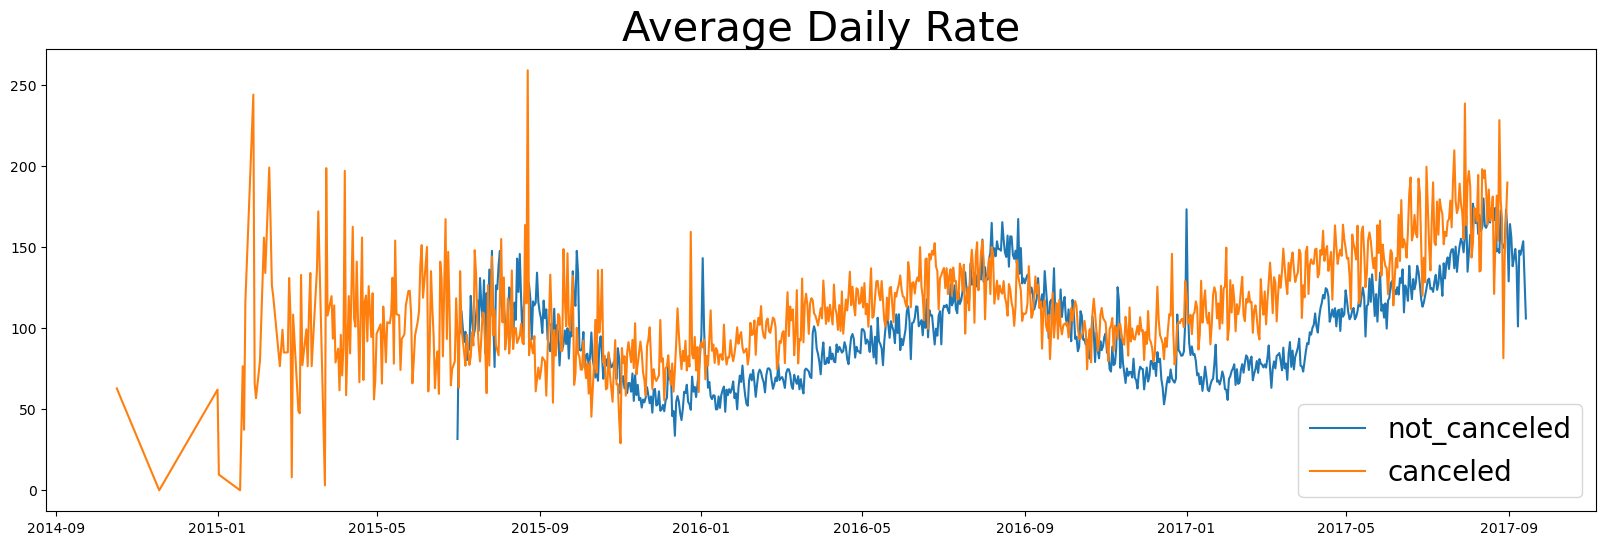

In [30]:
plt.figure(figsize = (20,6))
plt.title("Average Daily Rate", fontsize = 30)
plt.plot(not_canceled_df_adr['reservation_status_date'],not_canceled_df_adr['adr'],label = 'not cancelled')
plt.plot(canceled_df_adr['reservation_status_date'],canceled_df_adr['adr'],label = 'cancelled')
plt.legend(['not_canceled','canceled'],fontsize = 20)

In [31]:
canceled_df_adr = canceled_df_adr[(canceled_df_adr['reservation_status_date'] > '2016') & (canceled_df_adr['reservation_status_date'] < '2017-09')]
not_canceled_df_adr = not_canceled_df_adr[(not_canceled_df_adr['reservation_status_date'] > '2016') & (not_canceled_df_adr['reservation_status_date'] < '2017-09')]